In [ ]:
!apt install libtesseract-dev tesseract-ocr > /dev/null
!pip install pytesseract > /dev/null
!pip install keras-ocr > /dev/null

In [ ]:
import keras_ocr
import pytesseract
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
detector = keras_ocr.detection.Detector()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [ ]:
def tess_recognize_from_boxes(image, detections, config):
  predictions = []
  # for each box
  for i, box in enumerate(detections):
    # get the cropped and algned image
    cropped_warped = keras_ocr.tools.warpBox(image, box)

    # Perform tesseract OCR on the cropped Text
    text = pytesseract.image_to_string(cropped_warped, config=config)
    
    # Store the text and the corresponding box 
    if text:
      predictions.append((text, box))
  return predictions  

In [ ]:
def modified_tesseract(image, config=('--psm 6')):
  # Detect the Text boxes from the image using Keras-ocr
  detections = detector.detect([image])[0]
  
  # Run tesseract on boxes defined above
  predictions = tess_recognize_from_boxes(image, detections, config)

  return predictions

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline(scale=1)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving invoice.png to invoice.png


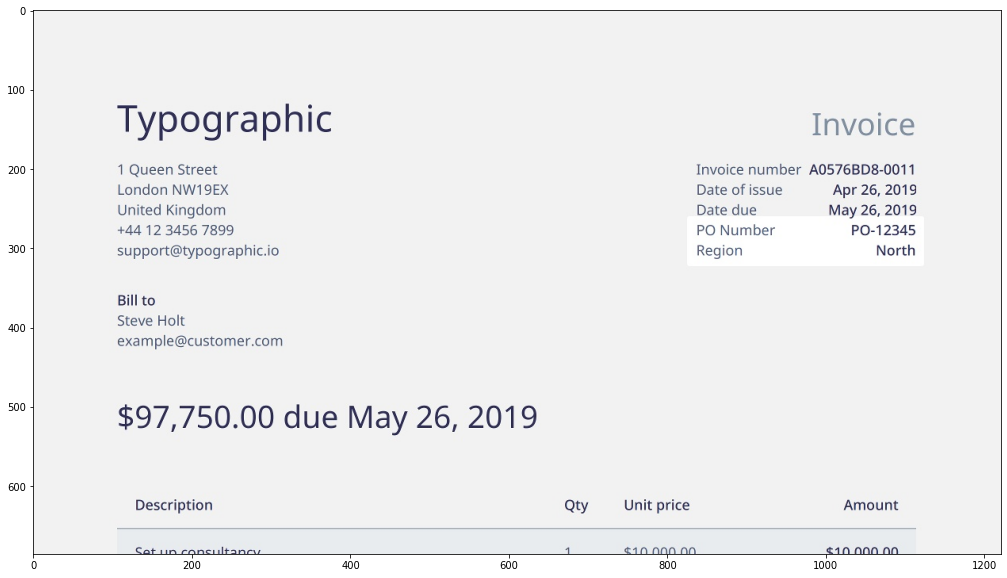

In [ ]:
Image("invoice.png",width=500)

In [ ]:
detector = keras_ocr.detection.Detector()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


In [ ]:
image = keras_ocr.tools.read("invoice.png")
detections = detector.detect([image])[0]

In [ ]:
def display_boxes(image, boxes):
  img = keras_ocr.tools.drawBoxes(image.copy(),boxes)
  plt.figure(figsize=[10,10])
  plt.imshow(img)
  plt.show()

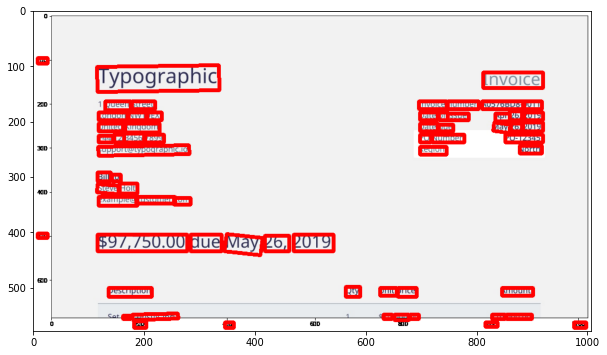

In [ ]:
display_boxes(image,detections)

In [ ]:
def tess_recognize_from_boxes(image, detections, config):
  predictions = []
  # for each box
  for i, box in enumerate(detections):
    # get the cropped and algned image
    cropped_warped = keras_ocr.tools.warpBox(image, box)

    # Perform tesseract OCR on the cropped Text
    text = pytesseract.image_to_string(cropped_warped, config=config)
    
    # Store the text and the corresponding box 
    if text:
      predictions.append((text, box))
  return predictions

In [ ]:
def modified_tesseract(image, config=('--psm 6')):
  # Detect the Text boxes from the image using Keras-ocr
  detections = detector.detect([image])[0]
  
  # Run tesseract on boxes defined above
  predictions = tess_recognize_from_boxes(image, detections, config)

  return predictions

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


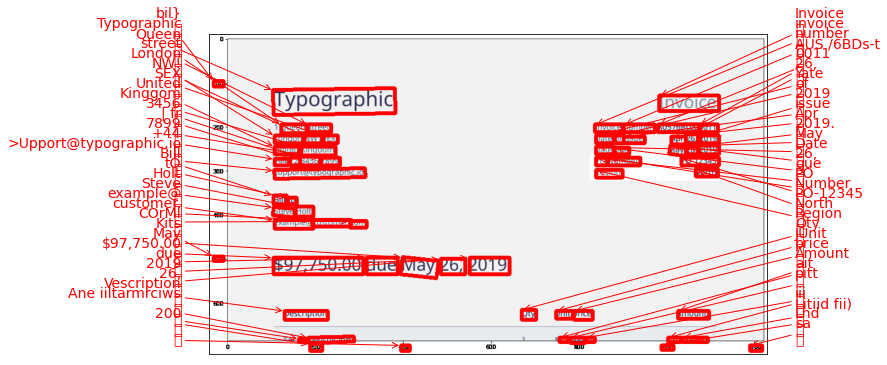

In [ ]:
predictions = modified_tesseract(image)
fig,ax = plt.subplots(figsize = [10,10])
keras_ocr.tools.drawAnnotations(image, predictions, ax=ax)

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
prediction_groups = pipeline.recognize([image])

In [ ]:
print(prediction_groups)

[[('1ed', array([[ 7., 85.],
       [26., 85.],
       [26., 95.],
       [ 7., 95.]], dtype=float32)), ('typographic', array([[116.85564, 104.03702],
       [335.9441 , 102.71721],
       [336.1886 , 143.30008],
       [117.10011, 144.61989]], dtype=float32)), ('invoice', array([[812., 113.],
       [918., 113.],
       [918., 137.],
       [812., 137.]], dtype=float32)), ('queen', array([[128., 163.],
       [175., 163.],
       [175., 178.],
       [128., 178.]], dtype=float32)), ('street', array([[177., 163.],
       [220., 163.],
       [220., 177.],
       [177., 177.]], dtype=float32)), ('invoice', array([[695.99994, 162.99998],
       [745.99994, 162.99998],
       [745.99994, 176.99998],
       [695.99994, 176.99998]], dtype=float32)), ('number', array([[749., 163.],
       [804., 163.],
       [804., 177.],
       [749., 177.]], dtype=float32)), ('a0576bd61', array([[810., 163.],
       [887., 163.],
       [887., 177.],
       [810., 177.]], dtype=float32)), ('0011', array([

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


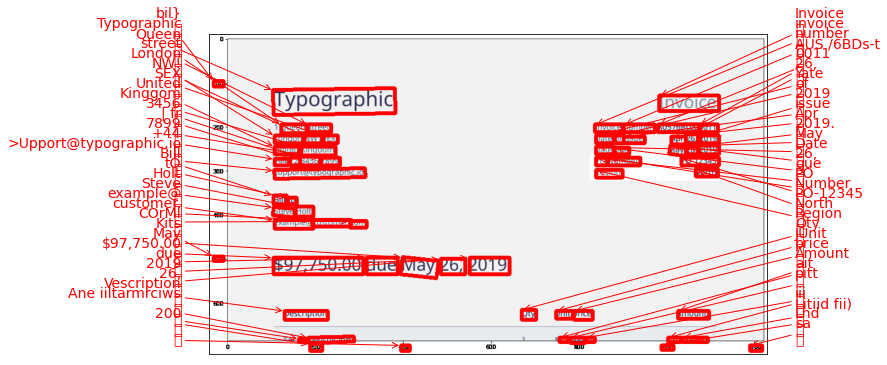

In [ ]:
fig,ax = plt.subplots(figsize = [10,10])
keras_ocr.tools.drawAnnotations(image, predictions, ax=ax)

In [ ]:
A = prediction_groups[0][35][0]
B = A[0:7] + "@"+ A[8:19]
C = "." + prediction_groups[0][36][0]
First_Email = B + C

D = prediction_groups[0][44][0]
E = prediction_groups[0][45][0]
Second_Email = D + "@" + E[1:-3] + "." + E[9 : 12]

In [ ]:
print("Extracted EMail IDs:")
print(First_Email)
print(Second_Email)
F = prediction_groups[0][48][0]
G = prediction_groups[0][49][0]
print("Extracted Billing Amount:")
Extreacted_amount = print("$"+F[1:len(F)] + "," + G[0:(len(G)-2)] + "." + G[(len(G)-2) : len(G)])

Extracted EMail IDs:
support@typographic.io
example@customer.com
Extracted Billing Amount:
$97,750.00
